# Team Members
Hemanth Kumar Reddy Gunnam, Unisha Aryal, Harish Gadde, Nikhil Bharadwaj Narayanam

In [1]:
import numpy as np 
import pandas as pd 

# data processing/manipulation
pd.options.mode.chained_assignment = None
import re

# data visualization
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px

# stopwords, tokenizer, stemmer
import nltk
import torch
from transformers import pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist


# spell correction, lemmatization
from textblob import TextBlob
from textblob import Word

# sklearn
from sklearn.model_selection import train_test_split

# Importing Dataset

Data Loaded from https://www.kaggle.com/datasets/manchunhui/us-election-2020-tweets

In [2]:
Trump_tweets=pd.read_csv('./hashtag_donaldtrump.csv',lineterminator='\n')
Biden_tweets=pd.read_csv('./hashtag_joebiden.csv',lineterminator='\n')
Trump_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [3]:
Trump_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [4]:
Trump_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

In [5]:
Biden_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [6]:
Biden_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [236]:
Biden_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776886 entries, 0 to 776885
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            776886 non-null  object 
 1   tweet_id              776886 non-null  float64
 2   tweet                 776886 non-null  object 
 3   likes                 776886 non-null  float64
 4   retweet_count         776886 non-null  float64
 5   source                776173 non-null  object 
 6   user_id               776886 non-null  float64
 7   user_name             776868 non-null  object 
 8   user_screen_name      776886 non-null  object 
 9   user_description      694880 non-null  object 
 10  user_join_date        776886 non-null  object 
 11  user_followers_count  776886 non-null  float64
 12  user_location         543095 non-null  object 
 13  lat                   355293 non-null  float64
 14  long                  355293 non-null  float64
 15  

# Loading cleaned Dataset 

In [7]:
trump_df=pd.read_csv('/Users/nikhilbharadwaj/Documents/Trump.csv',lineterminator='\n')   #Importing data cleaned using tableau
biden_df=pd.read_csv('/Users/nikhilbharadwaj/Documents/Biden.csv',lineterminator='\n')

In [8]:
trump_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213259 entries, 0 to 213258
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            213259 non-null  object 
 1   tweet                 213259 non-null  object 
 2   filtered_tweets       213259 non-null  object 
 3   source                213243 non-null  object 
 4   user_name             213258 non-null  object 
 5   user_screen_name      213259 non-null  object 
 6   user_join_date        213259 non-null  object 
 7   user_followers_count  213259 non-null  int64  
 8   user_location         213259 non-null  object 
 9   lat                   213259 non-null  float64
 10  long                  213259 non-null  float64
 11  city                  101967 non-null  object 
 12  country               213259 non-null  object 
 13  state                 178883 non-null  object 
 14  state_code            178883 non-null  object 
 15  

In [9]:
biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116076 entries, 0 to 116075
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   created_at       116076 non-null  object
 1   tweet            116076 non-null  object
 2   filtered_tweets  116069 non-null  object
 3   user_name        114073 non-null  object
 4   user_location    115961 non-null  object
 5   country          116076 non-null  object
 6   lat              113447 non-null  object
 7   long             107769 non-null  object
 8   city             100854 non-null  object
 9   state            105189 non-null  object
 10  state_code       94434 non-null   object
 11  collected_at     81866 non-null   object
dtypes: object(12)
memory usage: 10.6+ MB


# Sentiment Analysis 

In [10]:
trump_df = trump_df.dropna()   #Dropping null values
biden_df = biden_df.dropna()

In [27]:

# Create a sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", framework="pt", model="cardiffnlp/twitter-roberta-base-sentiment", device=0 if torch.cuda.is_available() else -1)

def Sentiment_Analysis(df, batch_size=30):            #function to run sentiment analysis
    Tweet_list = df['filtered_tweets'].tolist()
    results = []
    for i in range(0, len(Tweet_list), batch_size):
        batch = Tweet_list[i:i+batch_size]
        batch_results = classifier(batch)
        results.extend(batch_results)
    labels = [result['label'].replace('LABEL_0', 'negative').replace('LABEL_1', 'neutral').replace('LABEL_2', 'positive') for result in results]
    scores = [result['score'] for result in results]
    df['label'] = labels
    df['score'] = scores
    return df[['tweet', 'filtered_tweets', 'label', 'score']].head()

In [28]:
Sentiment_Analysis(biden_df)

,tweet,filtered_tweets,label,score
2,The more they don’t want you to vote the more ...,The more they dont want you to vote the more w...,neutral,0.540983
4,0.0,00,neutral,0.574473
5,0.0,00,neutral,0.574473
6,0.0,00,neutral,0.574473
7,0.0,00,neutral,0.574473


In [29]:
Sentiment_Analysis(trump_df)

,tweet,filtered_tweets,label,score
0,Mary Trump Pumps the Brakes on the Trump 2024 ...,mary trump pumps the brakes on the trump 2024 ...,neutral,0.490444
1,"'Trump Wants to Steal the Election, But He’ll ...",trump wants to steal the election but hell fai...,negative,0.905422
2,#Biden Gains Ground on #Trump in #Georgia and ...,biden gains ground on trump in georgia and pen...,neutral,0.791802
3,@BillyCorben @Bakari_Sellers @KamalaHarris @Se...,billycorben bakarisellers kamalaharris senkama...,positive,0.771295
4,@alexsalvinews whose 46th President of the #US...,alexsalvinews whose 46th president of the usa ...,neutral,0.828927


In [30]:
trump_Stweets=trump_df
biden_Stweets=biden_df

#saving as a new CSV file with labels and score(*as model takes lot of time to train this is a precautious step for further use*)

trump_Stweets.to_csv('/Users/nikhilbharadwaj/Documents/Trump_Stweets.csv',encoding='UTF-8',index=False)
biden_Stweets.to_csv('/Users/nikhilbharadwaj/Documents/Biden_Stweets.csv',encoding='UTF-8',index=False)

# Data Visualization

In [32]:
Trump_Positivetweets,Trump_Negativetweets,Trump_Neutraltweets=0,0,0
for label in trump_df['label']:
    if label=='positive':
        Trump_Positivetweets+=1
    if label=='negative':
        Trump_Negativetweets+=1
    if label=='neutral':
        Trump_Neutraltweets+=1
print(Trump_Positivetweets,Trump_Negativetweets,Trump_Neutraltweets)

6935 52257 42760


In [33]:
Biden_Positivetweets,Biden_Negativetweets,Biden_Neutraltweets=0,0,0
for sentiment in biden_df['label']:
    if sentiment=='positive':
        Biden_Positivetweets+=1
    if sentiment=='negative':
        Biden_Negativetweets+=1
    if sentiment=='neutral':
        Biden_Neutraltweets+=1
print(Biden_Positivetweets,Biden_Negativetweets,Biden_Neutraltweets)

8242 13110 41118


Total no.of positive tweets for trump: 6935
Total no.of negative tweets for trump: 52257
Total no.of neutral tweets for trump: 42760


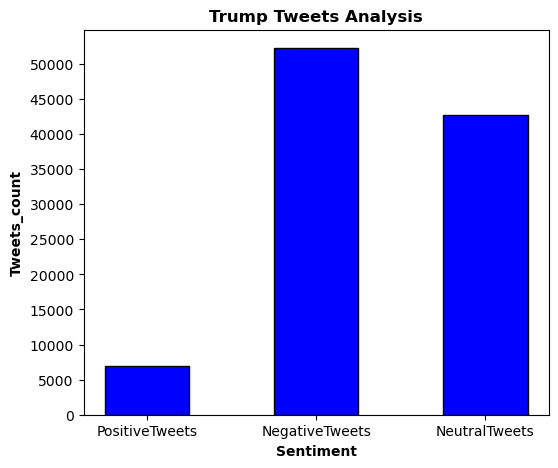

In [47]:
print('Total no.of positive tweets for trump:',Trump_Positivetweets)
print('Total no.of negative tweets for trump:',Trump_Negativetweets)
print('Total no.of neutral tweets for trump:',Trump_Neutraltweets)


Trump_data={'PositiveTweets':Trump_Positivetweets,'NegativeTweets':Trump_Negativetweets,'NeutralTweets':Trump_Neutraltweets}
T_Sentiment=list(Trump_data.keys())
T_Tweets_count=list(Trump_data.values())

plt.figure(figsize=(6,5))
plt.bar(T_Sentiment,T_Tweets_count,color='blue',width=0.5,edgecolor='black')

plt.xlabel('Sentiment',fontweight='bold')
plt.ylabel('Tweets_count',fontweight='bold')
plt.yticks(np.arange(0,55000,5000))
plt.title('Trump Tweets Analysis', fontweight='bold')
plt.show()

Total no.of positive tweets for biden: 8242
Total no.of negative tweets for biden: 13110
Total no.of neutral tweets for biden: 41118


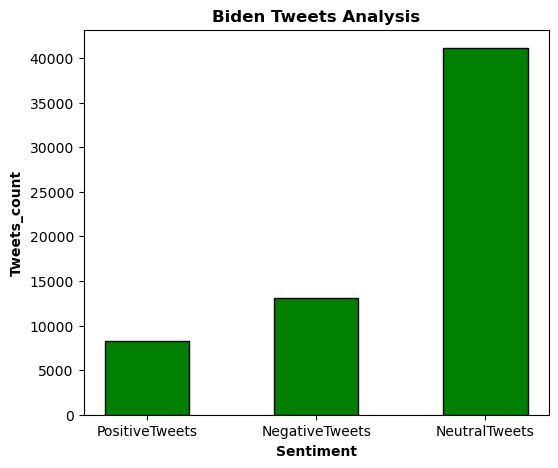

In [54]:
print('Total no.of positive tweets for biden:',Biden_Positivetweets)
print('Total no.of negative tweets for biden:',Biden_Negativetweets)
print('Total no.of neutral tweets for biden:',Biden_Neutraltweets)


Biden_data={'PositiveTweets':Biden_Positivetweets,'NegativeTweets':Biden_Negativetweets,'NeutralTweets':Biden_Neutraltweets}
B_Sentiment=list(Biden_data.keys())
B_Tweets_count=list(Biden_data.values())

plt.figure(figsize=(6,5))
plt.bar(B_Sentiment,B_Tweets_count,color='green',width=0.5,edgecolor='black')

plt.xlabel('Sentiment',fontweight='bold')
plt.ylabel('Tweets_count',fontweight='bold')
#plt.yticks(np.arange(0,55000,5000))
plt.title('Biden Tweets Analysis', fontweight='bold')
plt.show()

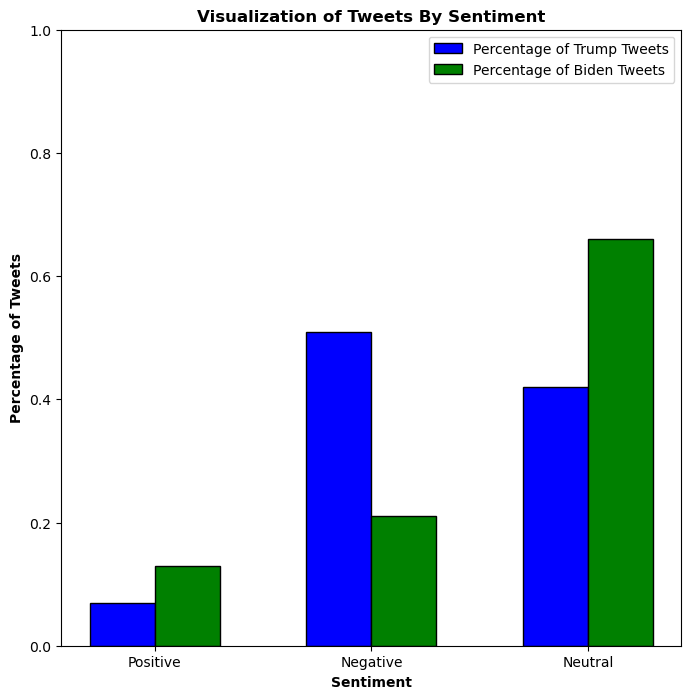

In [76]:
# Calculate relative percentages by sentiment - Trump
total_tweets_t = len(trump_df.label)
prop_tweets_t = list(map(lambda x: round(x/total_tweets_t,2), T_Tweets_count))

# Calculate relative percentages by sentiment - Biden
total_tweets_b = len(biden_df.label)
prop_tweets_b = list(map(lambda x: round(x/total_tweets_b,2), B_Tweets_count))

# Graphing relative percentages of both trump and biden tweets
bar_width = 0.30
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_tweets_t, color ='b', width = bar_width, 
            edgecolor ='black', label ='Trump') 
b = plt.bar(br2, prop_tweets_b, color ='g', width = bar_width, 
            edgecolor ='black', label ='Biden') 
   
plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Positive','Negative','Neutral'])
plt.legend([t,b],['Percentage of Trump Tweets','Percentage of Biden Tweets'])
plt.ylim(0.0,1.0)
plt.title('Visualization of Tweets By Sentiment',fontweight ='bold')

plt.show()

# Visualization of Tweets by States

In [203]:
trump_df['sentiment_score'] = np.where(trump_df['label'] == 'negative', -1 * trump_df['score'], trump_df['score'])

import plotly.express as px

# Calculate average polarity by state for Trump-related tweets
trump_state_polarity = trump_df.groupby("state", as_index=False).mean()

# Sort by descending order of average polarity
trump_state_polarity = trump_state_polarity.sort_values(by="sentiment_score", ascending=False)

# Create bar chart using plotly
fig = px.bar(trump_state_polarity, x="state", y="sentiment_score",
             title="<b>Average Polarity of Trump-Related Tweets by State</b>",
             labels={"state": "State", "sentiment_score": "Average Polarity Score"},
             color="sentiment_score",
             color_continuous_scale=px.colors.sequential.Reds)

# Customize chart appearance
fig.update_traces(marker_line_color='black', marker_line_width=0.6, opacity=0.8)
fig.update_xaxes(title=None, showticklabels=True, tickangle=90, tickfont=dict(size=10))
fig.update_yaxes(title=None, showticklabels=True, tickfont=dict(size=10))
fig.update_layout(legend_title=None, legend=dict(title=None, orientation="h", y=1.1, yanchor="bottom"))

# Show chart
fig.show()





In [208]:
biden_df['sentiment_score'] = np.where(biden_df['label'] == 'negative', -1 * biden_df['score'], biden_df['score'])

# Calculate average polarity by state for Biden-related tweets
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

biden_states_us=biden_df[biden_df['collected_at'].isin(us_states)]
biden_state_polarity_n = biden_states_us.groupby("collected_at", as_index=False).mean()

# Sort by descending order of average polarity
biden_state_polarity_n = biden_state_polarity_n.sort_values(by="sentiment_score", ascending=False)

# Create bar chart using plotly
fig = px.bar(biden_state_polarity_n, x="collected_at", y="sentiment_score",
             title="<b>Average Polarity of Biden-Related Tweets by State</b>",
             labels={"state": "State", "sentiment_score": "Average Polarity Score"},
             color="sentiment_score",
             color_continuous_scale=px.colors.sequential.Reds)

# Customize chart appearance
fig.update_traces(marker_line_color='black', marker_line_width=0.6, opacity=0.8)
fig.update_xaxes(title=None, showticklabels=True, tickangle=90, tickfont=dict(size=10))
fig.update_yaxes(title=None, showticklabels=True, tickfont=dict(size=10))
fig.update_layout(legend_title=None, legend=dict(title=None, orientation="h", y=1.1, yanchor="bottom"))

# Show chart
fig.show()

# Word Cloud

In [246]:
stop_words = set(stopwords.words('english'))

def clean_tweet(filtered_tweets, stem=False, lemmatize=False):
        
    cleaned_tweet = []
    words = word_tokenize(filtered_tweets) 

    # Remove stopwords and stem
    for word in words:
        if word not in stop_words:
            cleaned_tweet.append(word)
            
    return cleaned_tweet

In [248]:
trump_df['tweettokens'] = trump_df.filtered_tweets.apply(lambda x: clean_tweet(x))
biden_df['tweettokens'] = biden_df.filtered_tweets.apply(lambda x: clean_tweet(x))

In [255]:
# Function to return a string of all words in all tweets
def get_all_tweets(df,by_sentiment=False,label="positive"):
    words = ' '.join(df['tweettokens'].apply(lambda x: ' '.join(x)))
    return words

In [262]:
# Create word strings
words_trump = get_all_tweets(trump_df)
words_biden = get_all_tweets(biden_df)

# Tokenize word strings
tokens_trump = word_tokenize(words_trump)
tokens_biden = word_tokenize(words_biden)

# Function to generate word cloud
def create_wordcloud(words):
    
    # create wordcloud
    wordcloud = WordCloud(max_font_size=200, max_words=150, 
                          background_color="white").generate(words)

    # display the generated image
    plt.figure(1,figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

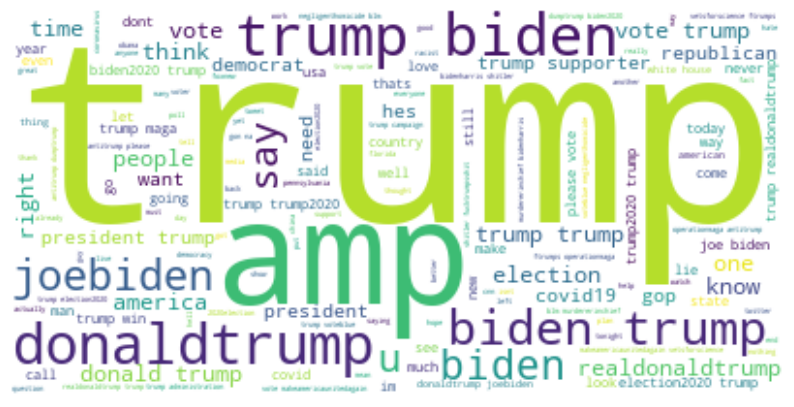

In [263]:
create_wordcloud(words_trump)

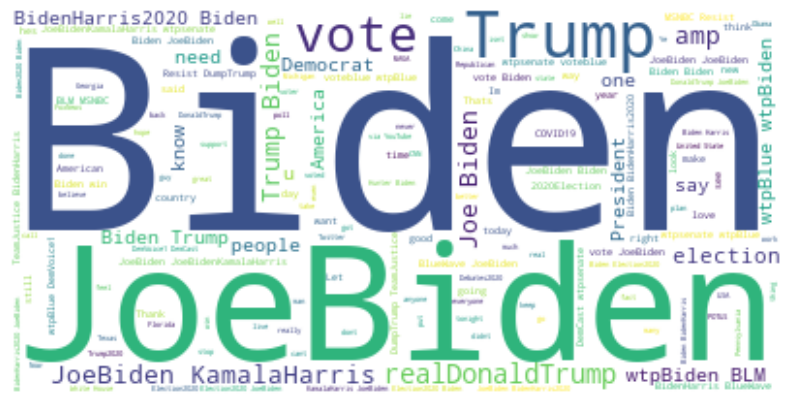

In [264]:
create_wordcloud(words_biden)

In [323]:


def Visualize_bymonth(df):
    month_order=['October','November']
    # convert date column to datetime objects and exclude rows with invalid dates
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
    df = df.dropna(subset=['created_at'])
    
    # create month column and group by month and label
    df['month'] = df['created_at'].dt.strftime('%B')
    df = df[df['month'].isin(['October', 'November'])] # filter by October and November months
    grouped_data = df.groupby(['month', 'label'])['label'].count().reset_index(name="count")
    
    # pivot the data and plot the results
    pivoted_data = grouped_data.pivot(index='month', columns='label', values='count')
    pivoted_data = pivoted_data.reindex(month_order)
    pivoted_data.plot(kind='bar', stacked=False, figsize=(10, 6),edgecolor='black')
    plt.xlabel('Month', fontweight='bold')
    plt.ylabel('Count', fontweight='bold')
    plt.title('Sentiment distribution by month', fontweight='bold')
    
    # show the plot
    return plt.show()




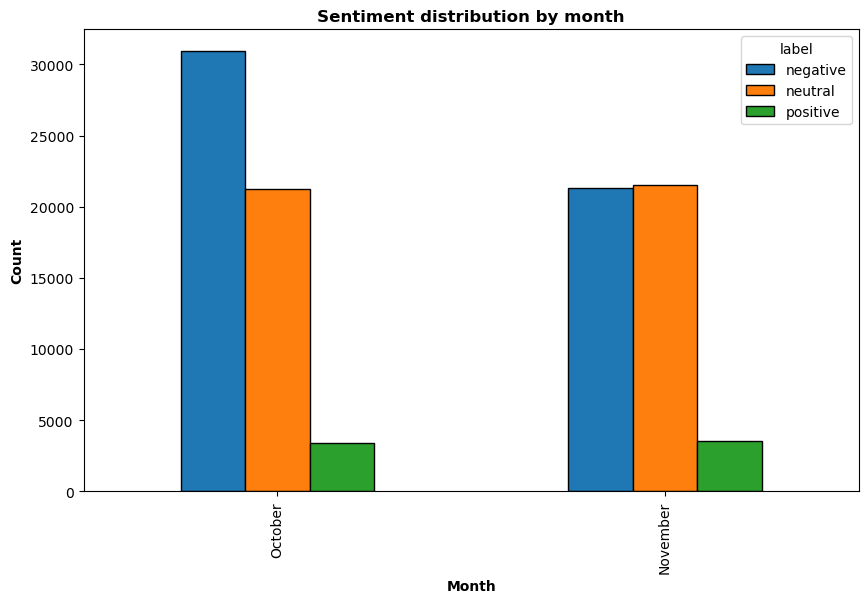

In [324]:
Visualize_bymonth(trump_df)

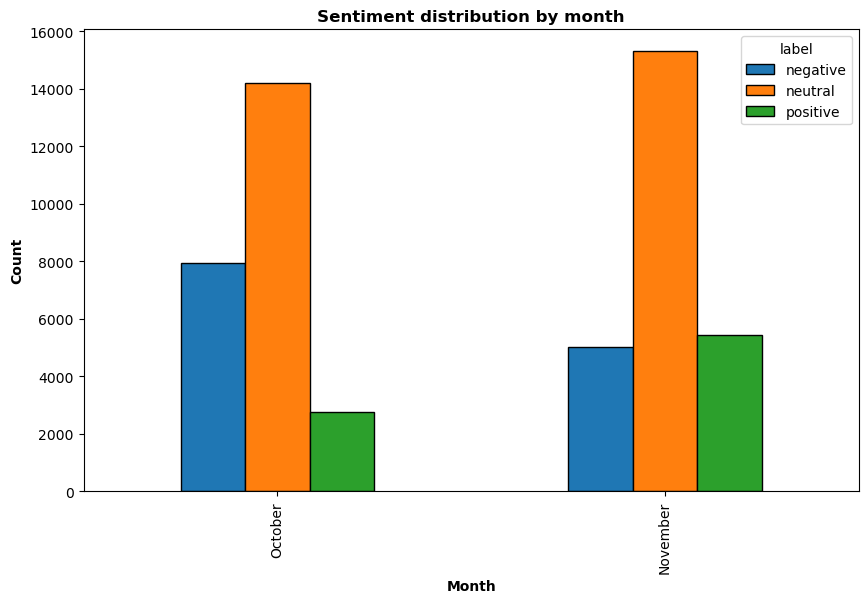

In [325]:
Visualize_bymonth(biden_df)

# Conclusions

Overall, there are more negative tweets related to Trump as compared to Biden. This indicates that there are more people who do not favor Trump as a Presidential candidate. Based on these graphs, we can say that Biden is more likely to win the 2020 Presidential Election. However, it’s still important to keep in mind that Twitter users are not necessarily representative of the entire population, and that there may be other factors at play that are not reflected in this data